### Install Dependencies

This step is only for importing libraries, such as numpy, pandas, matplotlib and statsmodels, which is the library that contains the SARIMA model and other statistical resources.

In [1]:
import warnings
import itertools
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

### Layout Configuration

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

### Import DataSet

Our data are based on shares of the company Petróleo Brasileiro S.A. — Petrobras (PETR4.SA). 

In [3]:
series_petr4 = yf.download("PETR4.SA", start="2015-01-01", end="2020-10-02")
series_petr4_open = series_petr4.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed


In [4]:
series_petr4_open.head(10)

,Open
Date,
2015-01-02,9.99
2015-01-05,9.14
2015-01-06,8.71
2015-01-07,8.56
2015-01-08,8.79
2015-01-09,9.20
2015-01-12,9.27
2015-01-13,8.90
2015-01-14,8.88


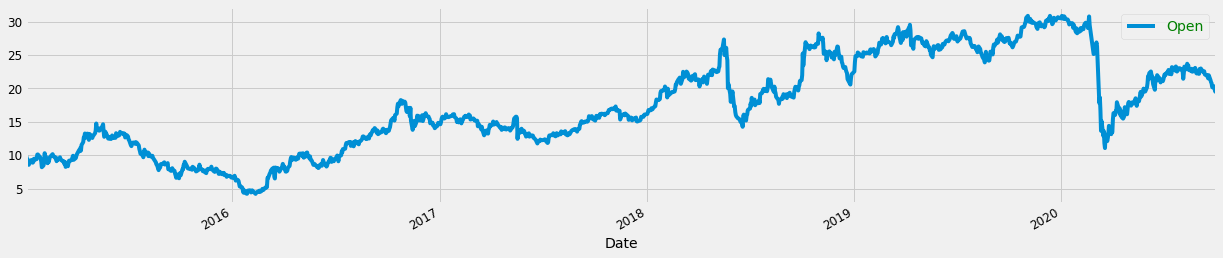

In [5]:
series_petr4_open.plot(figsize = (19, 4)) 
plt.show()

### Time Series Decomposition - Additive Model

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

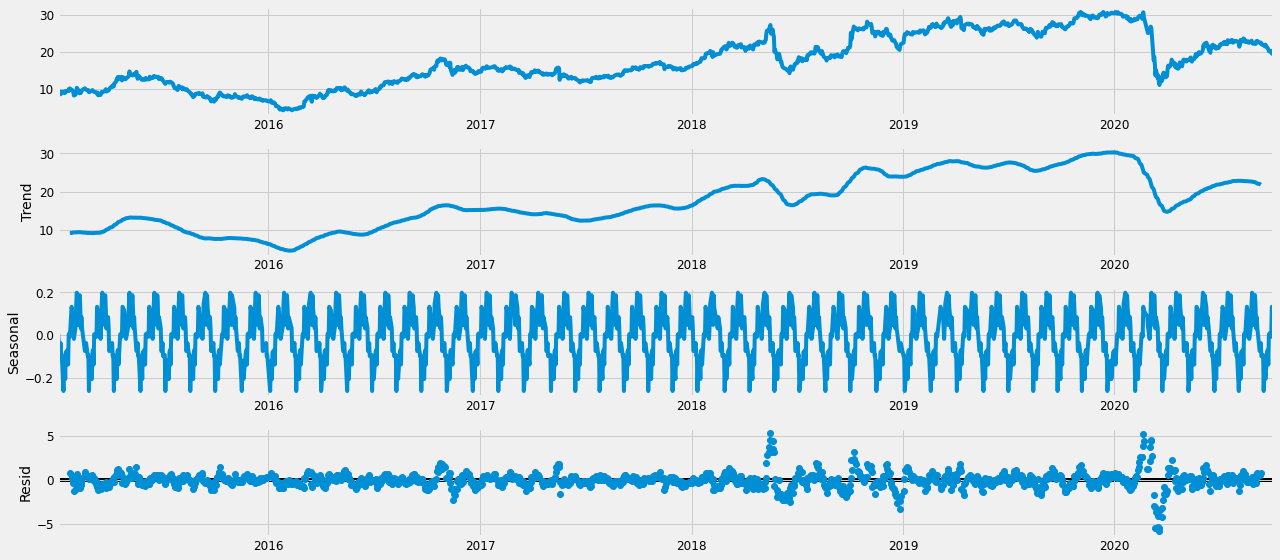

In [7]:
decomposition = sm.tsa.seasonal_decompose(x=series_petr4_open, freq=30, model='additive')
fig = decomposition.plot()
plt.show()

### Time Series Decomposition - Multiplicative Model

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
series_petr4_close = series_petr4.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis=1)

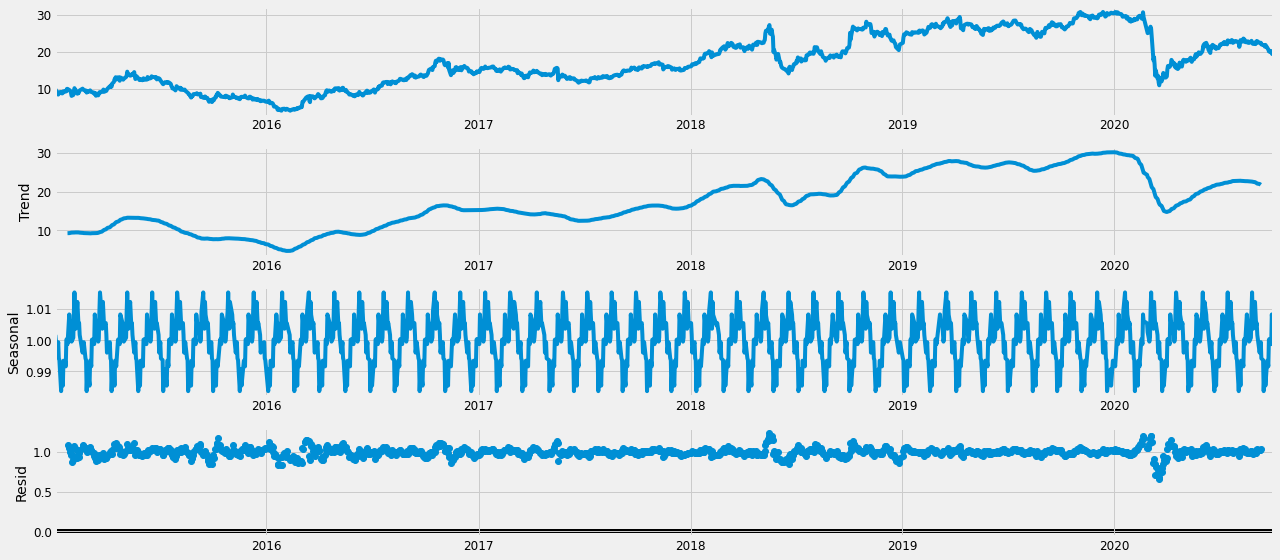

In [9]:
decomposition = sm.tsa.seasonal_decompose(x=series_petr4_open, freq=30, model='multiplicative')
fig = decomposition.plot()
plt.show()

### SARIMA for predict Time Series

The model notation is <b>SARIMA(p, d, q).(P,D,Q)m</b>. 

This three parameters are responsable for ​​sazonability, tendency and noise in data

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Exemplos de parâmetros para o SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de parâmetros para o SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [12]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [13]:
evaluation_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series_petr4_open,
                                            order=param,
                                            seasonal_order=param_seasonal)
            results = mod.fit()
            evaluation = 'SARIMAX{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic)
            print(evaluation)
            evaluation_list.append({"evaluation" : evaluation, "aic" : results.aic})
        except: 
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12436.00184995295
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10669.146323239453
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:6125.310127345592
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6126.752242119102
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6223.721913905304
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6224.914147006447
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6126.866729600371
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6122.350215561937
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10523.14499241388
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8839.415942536278
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4819.170251617246
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4807.5373772990915
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4901.780498255745
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4891.387635618017
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4810.786089978526
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4765.258244665602
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2328.889019131936
SARIMAX(0, 1, 0)x(0, 0, 1, 12

In [14]:
len(evaluation_list)

64

According to Peterson, T. (2014), the AIC (Akaike's information criterion) is an estimator of the relative quality of statistical models for a given data set.

Given a collection of models for the data, AIC estimates the quality of each model, in relation to each of the other models. The lower the AIC value, the better.

Our output suggests that SARIMAX(1, 1, 0)x(0, 0, 0, 12) with the value of AIC 2325.46 being the best combination, so we must consider that this is the ideal option.

In [15]:
aic = min(evaluation_list, key=lambda x:x['aic'])
aic

{'evaluation': 'SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2325.4616549234506',
 'aic': 2325.4616549234506}

In [16]:
mod = sm.tsa.statespace.SARIMAX(series_petr4_open,
                                order=(1, 1, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0616      0.017     -3.563      0.000      -0.095      -0.028
sigma2         0.2972      0.004     69.917      0.000       0.289       0.306


With the diagnosis below, we can view important information such as the distribution and the automatic correlation function ACF (correlogram). Values above "0" have some correlation in the time series data. Values close to "1" demonstrate the strongest correlation.

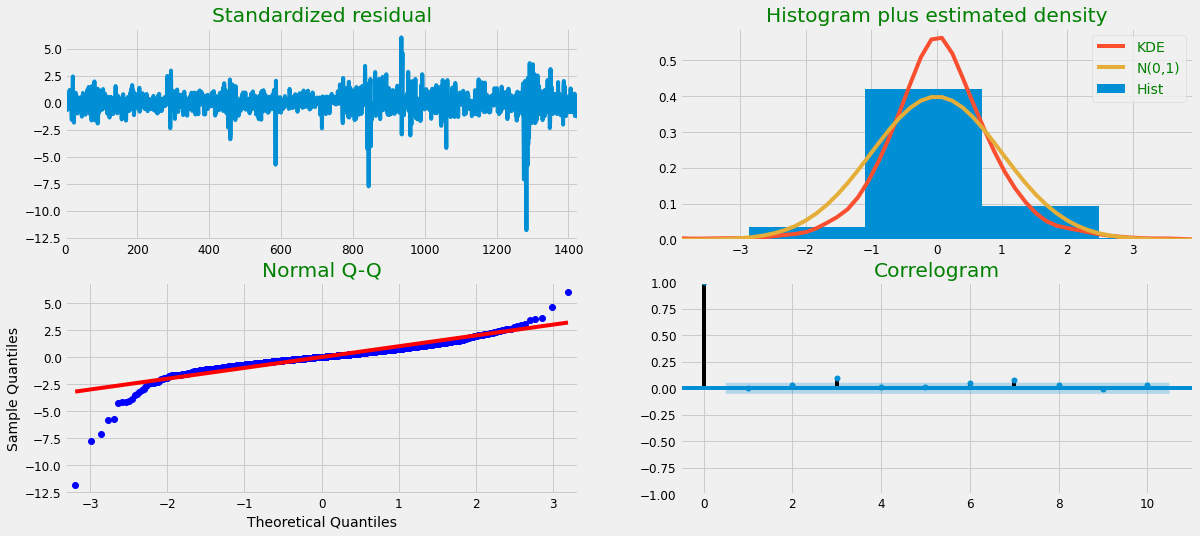

In [17]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [18]:
# Predição com intervalo de confiança de baixa e alta
pred = results.get_prediction(start=pd.to_datetime("2018-06-01"), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(5)

,lower Open,upper Open
Date,,
2018-06-01,17.297416,19.434565
2018-06-04,18.419398,20.556547
2018-06-05,16.361172,18.498321
2018-06-06,16.287117,18.424266
2018-06-07,15.456215,17.593364


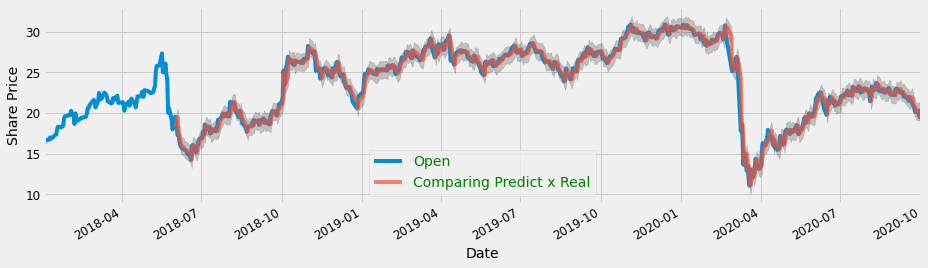

In [19]:
# Range do Gráfico com início em 2015
ax = series_petr4_open['2018':].plot(label='observed')
# Predição com base na confiança média
pred.predicted_mean.plot(ax=ax, label='Comparing Predict x Real', alpha=.7, figsize=(14, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Share Price')
plt.legend()
plt.show()

### Evaluating Model

In [20]:
y_forecasted = pred.predicted_mean
y_truth = np.reshape(series_petr4_open['2018-06-01':].values, (1, 578))


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = ((y_forecasted.values - y_truth) ** 2).mean()
print('O erro médio quadrático é {}'.format(round(mse, 2)))
print('A raiz quadrada do erro médio é {}'.format(round(np.sqrt(mse), 2)))
print('O erro percentual absoluto médio é {}'.format(round(mean_absolute_percentage_error(y_truth, y_forecasted.values), 2)))

O erro médio quadrático é 0.46
A raiz quadrada do erro médio é 0.67
O erro percentual absoluto médio é 2.05
